# Chapter3_Lab1

## Goal
In this lab, we will work with the VPAL data to explore the distribution for some of the variables in the dataset. We will also perform some descriptive analysis.

## Computing Centrality of the data
First, we upload the data - which is in the parsed file "VPALDataParsed.csv" - into a dataframe.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
vpal_df1 = pd.read_csv("VPALDataParsed.csv")
vpal_df1.head()

,User ID,Quest Taken,Quest Completed,Dialogues,Loots,Loots Items,Loots Dead,Shots,Kills,Interaction NPC,Interaction Container,Attacks,Attacks - Quest Related,Attacks - Friendly NPC,Attacks - UnMotivated,Attacks - SelfDefense,Trajectory
0,101,7,5,39,48,42,4,115,10,16,32,47,38,0,4,5,"[Introhouse, Outside, Bar, Outside, SheriffOff..."
1,103,9,4,47,35,33,2,0,1,23,33,7,7,0,0,0,"[Introhouse, Outside, Bar, Outside, SheriffOff..."
2,105,7,5,68,1,0,1,0,1,27,20,3,3,0,0,0,"[Introhouse, Outside, Introhouse, Outside, Aba..."
3,106,8,3,64,59,42,0,302,44,24,33,341,115,212,8,6,"[Introhouse, Outside, Bar, Outside, SheriffOff..."
4,108,6,3,27,2,2,0,15,0,12,2,14,13,1,0,0,"[Introhouse, Outside, Bar, Outside, Mine]"


We're going to be working with the Quest Completed column. We will plot it as a histogram and then measure its mean, median and mode

We'll plot this in three different ways. First, we'll use matplotlib to plot a distribution curve over the histogram. It's not smoothed, but you can certainly see whether or not it is normally distributed or not.

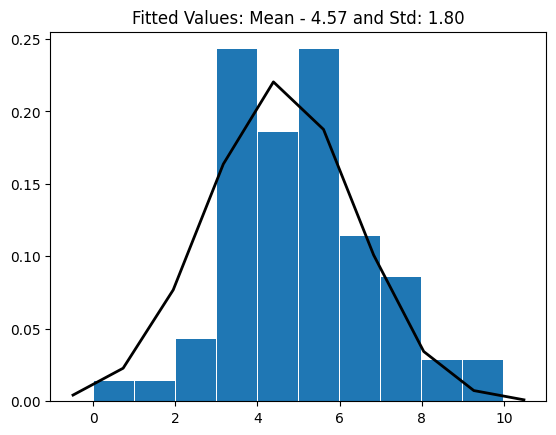

In [14]:
from scipy.stats import norm
from scipy.interpolate import make_interp_spline
import seaborn as sns

mu, std = norm.fit(vpal_df1["Quest Completed"])
plt.hist(vpal_df1["Quest Completed"], bins=10, rwidth=0.98, density=True);

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 10)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Fitted Values: Mean - {:.2f} and Std: {:.2f}".format(mu, std)
plt.title(title)

plt.show;


One thing you should note: the Y-axis is not what we would expect. It represents the probability, not an actual count.

To solve this easily, we'll use two seaborn plots. Seaborn is built on top of matplotlib so it is an easy solution rather than manually adding lines of code using matplotlib. We will use histplot and distplot. From the names you should be able to guess what they plot: histogram and distribution.

Conveniently, the retain the more useful Y-axis.

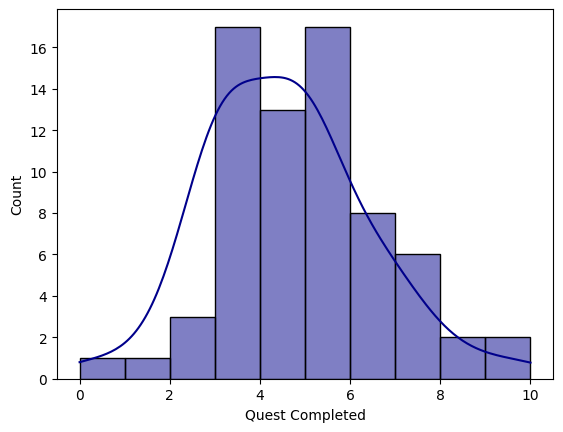

In [15]:
sns.histplot(vpal_df1["Quest Completed"], kde=True, bins=10, color='darkblue');

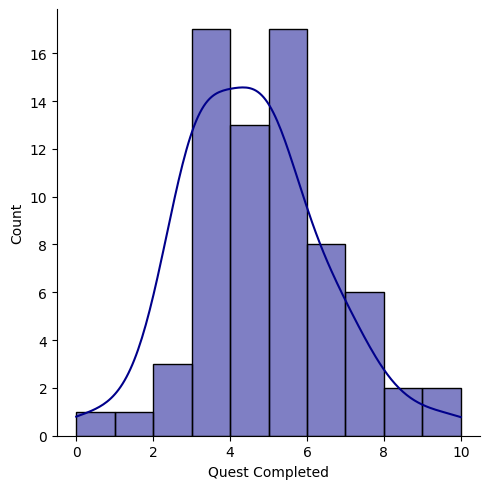

In [16]:
sns.displot(vpal_df1["Quest Completed"], kde=True, bins=10, color='darkblue');

Despite their slight differences in appearance, we can see a bell-shaped, normal distribution.

Now, let's access the measures of centrality directly.

You can easily access these measure for ALL of the columns in the dataframe with a "describe" attribute.

In [17]:
vpal_df1.describe()

,User ID,Quest Taken,Quest Completed,Dialogues,Loots,Loots Items,Loots Dead,Shots,Kills,Interaction NPC,Interaction Container,Attacks,Attacks - Quest Related,Attacks - Friendly NPC,Attacks - UnMotivated,Attacks - SelfDefense
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,143.157143,9.528571,4.571429,55.914286,30.285714,23.471429,4.228571,39.671429,8.871429,25.000000,21.014286,48.971429,13.900000,21.957143,4.671429,8.442857
std,26.442519,3.458748,1.814366,22.204415,19.745587,17.876161,6.290484,55.361715,8.816851,12.359354,12.827160,65.672656,23.955968,52.682928,9.472648,11.559093
min,101.000000,1.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,122.250000,7.000000,3.000000,40.500000,12.250000,6.000000,0.000000,0.000000,2.000000,16.000000,10.000000,7.750000,3.000000,0.000000,0.000000,0.000000
50%,140.500000,9.500000,4.500000,56.000000,32.500000,26.000000,2.500000,14.500000,7.500000,23.500000,21.000000,32.000000,4.000000,1.000000,0.000000,2.000000
75%,160.750000,12.000000,5.750000,72.750000,47.000000,39.000000,5.000000,63.000000,11.000000,34.250000,31.000000,47.750000,12.750000,13.250000,5.750000,16.750000
max,236.000000,16.000000,10.000000,115.000000,64.000000,60.000000,35.000000,302.000000,44.000000,61.000000,53.000000,341.000000,115.000000,255.000000,48.000000,41.000000


As you can see, the Quest Completed column shows a mean of 4.571429 and a standard deviation of 1.814366.

But, what if we didn't want all this info?

In [18]:
vpal_df1["Quest Completed"].mean()

4.571428571428571

In [19]:
vpal_df1["Quest Completed"].std()

1.8143664089258569

In [20]:
vpal_df1["Quest Completed"].median()

4.5

In [21]:
vpal_df1["Quest Completed"].mode()

0    3
1    5
Name: Quest Completed, dtype: int64

The mode returns two outputs - because there are two modes. The first column is the index of the output table. The second column are the two modes, 3 and 5.

We can verify this is correct by counting the values in the column and seeing if 3 and 5 occur most often - which is the definition of 'mode'.

In [22]:
vpal_df1["Quest Completed"].value_counts()

5     17
3     17
4     13
6      8
7      6
2      3
8      2
9      1
10     1
0      1
1      1
Name: Quest Completed, dtype: int64

3 and 5 occur most often at 17 times each!

Also, not that the mean and median are very close. This is also an indication of a normal distribution. But, what about a skewed distribution? Let's look at one next.

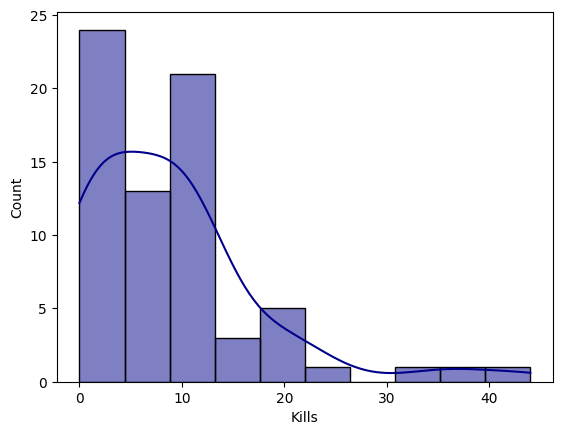

In [23]:
sns.histplot(vpal_df1["Kills"], kde=True, bins=10, color='darkblue');

This is a very different curve! Also, the distance between mean and median is much larger - reflecting the skew.

In [24]:
vpal_df1["Kills"].mean()

8.871428571428572

In [25]:
vpal_df1["Kills"].median()

7.5

There's more than 1 whole number difference!

The vast majority of the curve - apart from the small increase and peak at the beginning - looks very much like an exponential curve. In order to tranform this to a normal distribution, we will use a square root transformation. This is recommended for left skewed distributions.


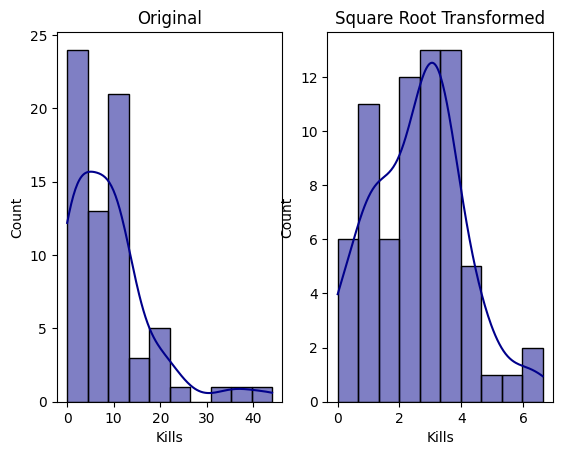

In [26]:
np.random.seed(42)
data_transf = np.sqrt(vpal_df1["Kills"])

fig, axs = plt.subplots(nrows=1, ncols=2, sharey=False)
sns.histplot(ax=axs[0], data=vpal_df1["Kills"], kde=True, bins=10, color='darkblue')
sns.histplot(ax=axs[1], data=data_transf, kde=True, bins=10, color='darkblue');

axs[0].set_title("Original")
axs[1].set_title("Square Root Transformed");

Not perfect - but much better!

Now let's look at the range for both columns, along with the variance and standard deviation for each.

In [27]:
rangeQC = (vpal_df1["Quest Completed"].min(axis=0), vpal_df1["Quest Completed"].max(axis=0))
print("The range of the Quest Completed column: ", rangeQC)

varQC = (vpal_df1["Quest Completed"].var(axis=0))
print("The variance of the Quest Completed column: {:.2f}".format(varQC))

sdQC = (vpal_df1["Quest Completed"].std(axis=0))
print("The standard deviation of the Quest Completed column: {:.2f}".format(sdQC))

The range of the Quest Completed column:  (0, 10)
The variance of the Quest Completed column: 3.29
The standard deviation of the Quest Completed column: 1.81


In [28]:
rangeK = (vpal_df1["Kills"].min(axis=0), vpal_df1["Kills"].max(axis=0))
print("The range of the Kills column: ", rangeK)

varK = (vpal_df1["Kills"].var(axis=0))
print("The variance of the Kills column: {:.2f}".format(varK))

sdK = (vpal_df1["Kills"].std(axis=0))
print("The standard deviation of the Kills column: {:.2f}".format(sdK))

The range of the Kills column:  (0, 44)
The variance of the Kills column: 77.74
The standard deviation of the Kills column: 8.82


## Correlation

Python has numerous ways to calculate correlation, depending on which library you wish to use. Since Pandas is very prolific in data science, we'll demonstrate how you can use pandas to calculate and visualize correlation first between two features and then a matrix for all features.

First, we'll look at correlation between two features - 'Shots' and 'Kills'. Then we'll compare multiple features in a matrix.

In [29]:
x = vpal_df1["Kills"]
y = vpal_df1["Shots"]

print(x.corr(y))
print(y.corr(x))

0.5425784459528626
0.5425784459528626


Of course, not matter which way you correlate the two, they would of course output the same number.

One thing to note: the default correlation is Pearson's r. To output Spearman's rho or Kendall's tau, you need to specify.

In [31]:
print("Spearman's rho: ", x.corr(y, method='spearman'))
print("Kendall's tau: ", x.corr(y, method='kendall'))

Spearman's rho:  0.455359037317683
Kendall's tau:  0.3354721885658526


Let's plot the Pearson's correlation between these two using seaborn.

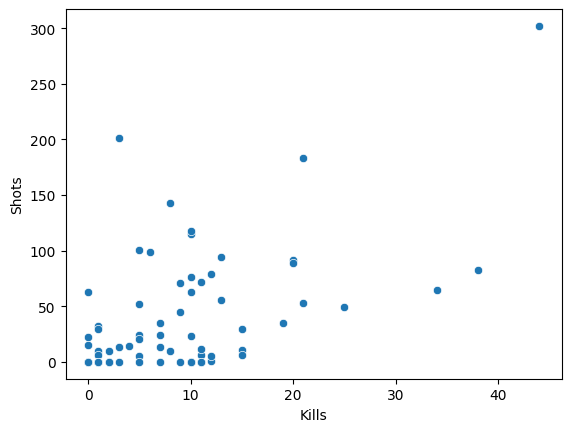

In [33]:
sns.scatterplot(x=x, y=y);

Visually, this does not indicate strong correlation. None of the three measures used above did so either.

Now let's look at the dataframe as a whole using a correlation matrix.

In [41]:
#First, let's make sure all measures are limitted to two decimal places and it only uses numeric columens.
vpal_corr = vpal_df1.corr(numeric_only=True)
round(vpal_corr, 2)

,User ID,Quest Taken,Quest Completed,Dialogues,Loots,Loots Items,Loots Dead,Shots,Kills,Interaction NPC,Interaction Container,Attacks,Attacks - Quest Related,Attacks - Friendly NPC,Attacks - UnMotivated,Attacks - SelfDefense
User ID,1.00,0.04,0.02,-0.09,-0.06,-0.06,0.09,-0.20,-0.11,-0.04,-0.04,-0.09,-0.22,-0.04,-0.00,0.11
Quest Taken,0.04,1.00,0.67,0.75,0.46,0.56,0.06,-0.10,-0.00,0.63,0.30,-0.32,-0.21,-0.32,0.04,0.06
Quest Completed,0.02,0.67,1.00,0.71,0.42,0.48,0.13,0.03,0.21,0.71,0.44,-0.33,-0.18,-0.43,0.33,0.20
Dialogues,-0.09,0.75,0.71,1.00,0.47,0.49,0.18,0.12,0.25,0.81,0.43,-0.26,-0.12,-0.36,0.19,0.21
Loots,-0.06,0.46,0.42,0.47,1.00,0.92,0.40,0.15,0.35,0.50,0.44,0.06,0.10,-0.03,0.10,0.18
Loots Items,-0.06,0.56,0.48,0.49,0.92,1.00,0.09,0.03,0.16,0.49,0.44,-0.08,-0.03,-0.12,0.05,0.10
Loots Dead,0.09,0.06,0.13,0.18,0.40,0.09,1.00,-0.10,0.20,0.19,0.15,-0.04,-0.06,-0.11,0.11,0.29
Shots,-0.20,-0.10,0.03,0.12,0.15,0.03,-0.10,1.00,0.54,0.13,0.30,0.52,0.70,0.26,0.25,0.09
Kills,-0.11,-0.00,0.21,0.25,0.35,0.16,0.20,0.54,1.00,0.37,0.22,0.57,0.41,0.38,0.44,0.32
Interaction NPC,-0.04,0.63,0.71,0.81,0.50,0.49,0.19,0.13,0.37,1.00,0.46,-0.19,-0.12,-0.30,0.33,0.23


This is a lot to try to take in! Again, a visualization can assist in making some sense of it.

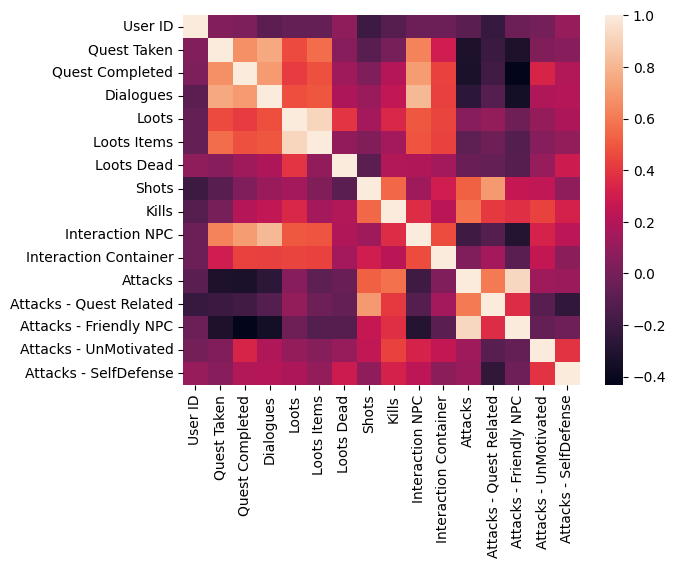

In [49]:
sns.heatmap(vpal_corr);

The lighter the color, the higher the correlation. This is why the squares on the diagonal are 1 - there is a perfect correlation between a feature and itself. The darker, the higher the correlation. For example, look at "Quests Taken" and "Attacks", which is surprisingly negative.

Also, the diagonal splits the matrix into two symmetrical halves. In fact, it is comment to output this matrix with only the measures below the diagonal.

Lastly, we can add the individual correlation measures as well.

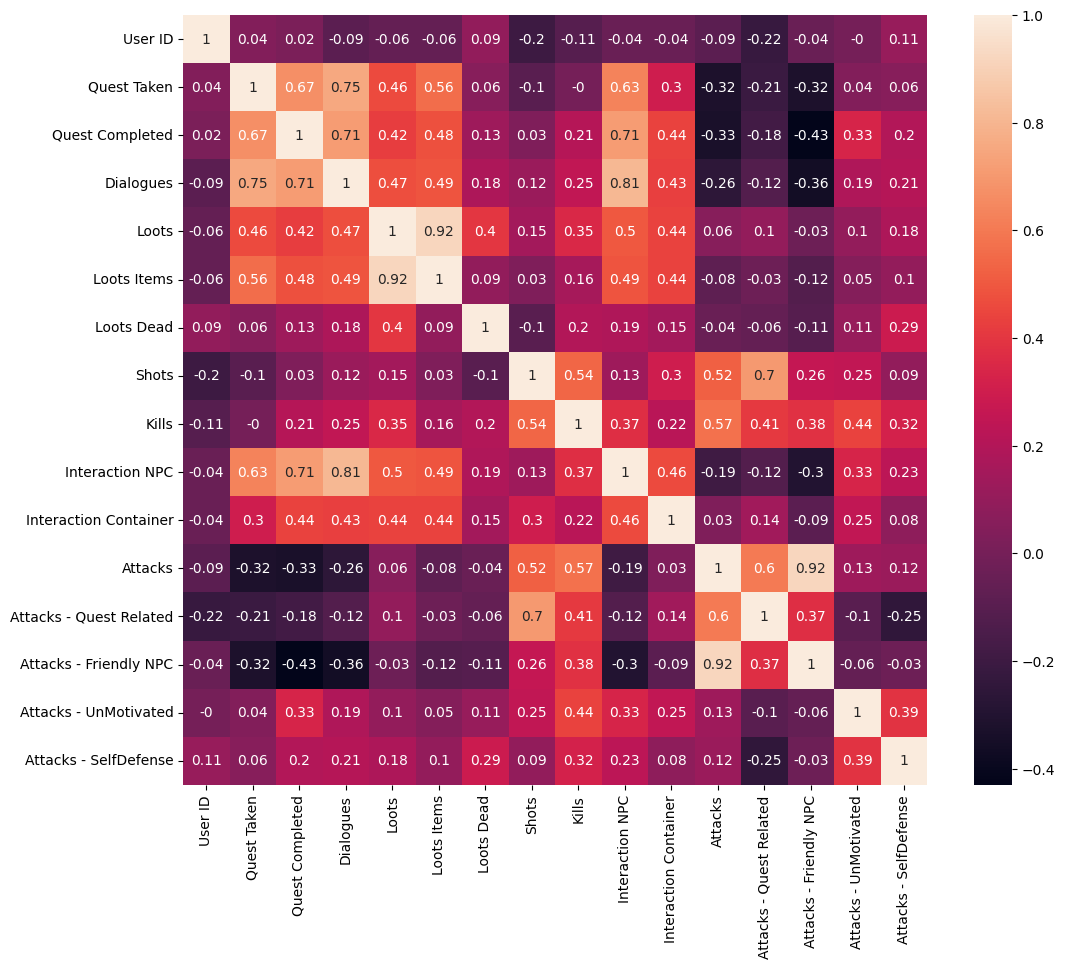

In [54]:
plt.figure(figsize=(12, 10))
sns.heatmap(round(vpal_corr,2), annot=True);